In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow.keras

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/FPD/FPD_MC2_C708'

train_dir = os.path.join(base_dir, 'train')
vali_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
test1_dir = os.path.join(base_dir, 'test1')

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
# shuffle is True by default
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    vali_dir,
    image_size=(180, 180),
    batch_size=20) # was 32
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(180, 180),
    batch_size=10, # was 32
    shuffle=True)
test1_dataset = image_dataset_from_directory(
    test1_dir,
    image_size=(180, 180),
    batch_size=10, # was 32
    shuffle=True)

Found 2722 files belonging to 17 classes.
Found 338 files belonging to 17 classes.
Found 340 files belonging to 17 classes.
Found 20 files belonging to 17 classes.


In [ ]:
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(17, activation="softmax")(x)

CNN_model = tf.keras.Model(inputs, outputs)

CNN_model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
CNN_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, min_lr=1e-6)
]

In [ ]:
# Initialize lists to store results
results = []
histories = []
# Fit the model
history = CNN_model.fit(train_dataset,batch_size=64, epochs=30, validation_data=validation_dataset, callbacks=callbacks, verbose=1)
# Store history
histories.append(history)
# Evaluate the model
evaluation = CNN_model.evaluate(test_dataset)
evaluation1 = CNN_model.evaluate(test1_dataset)

# Collect evaluation metrics
accuracy = evaluation[1]  # Assuming accuracy is the second element in the evaluation result
accuracy1 = evaluation1[1]
# Append results

Epoch 1/30
86/86 [==============================] - 1216s 13s/step - loss: 2.5642 - accuracy: 0.1275 - val_loss: 2.3535 - val_accuracy: 0.2485 - lr: 0.0010
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


86/86 [==============================] - 13s 144ms/step - loss: 2.0038 - accuracy: 0.3373 - val_loss: 2.1009 - val_accuracy: 0.3284 - lr: 0.0010
Epoch 3/30
86/86 [==============================] - 13s 144ms/step - loss: 1.7266 - accuracy: 0.4548 - val_loss: 1.5105 - val_accuracy: 0.5237 - lr: 0.0010
Epoch 4/30
86/86 [==============================] - 13s 143ms/step - loss: 1.3697 - accuracy: 0.5683 - val_loss: 1.2743 - val_accuracy: 0.6095 - lr: 0.0010
Epoch 5/30
86/86 [==============================] - 14s 146ms/step - loss: 1.1419 - accuracy: 0.6444 - val_loss: 1.0258 - val_accuracy: 0.6923 - lr: 0.0010
Epoch 6/30
86/86 [==============================] - 14s 148ms/step - loss: 0.9170 - accuracy: 0.7256 - val_loss: 0.9340 - val_accuracy: 0.7130 - lr: 0.0010
Epoch 7/30
86/86 [==============================] - 14s 145ms/step - loss: 0.8640 - accuracy: 0.7263 - val_loss: 0.8791 - val_accuracy: 0.7544 - lr: 0.0010
Epoch 8/30
86/86 [==============================] - 13s 143ms/step - loss: 

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate predictions
predictions = CNN_model.predict(test_dataset)

# Initialize lists for true labels and predicted labels
true_labels = []
pred_labels = []

# Iterate over the test dataset to collect true labels and predicted labels
for data, label in test_dataset:
    true_labels.append(label.numpy())  # Append true label
    pred_labels.append(np.argmax(CNN_model.predict(data), axis=1))  # Append predicted label

# Concatenate true labels and predicted labels into numpy arrays
y_true = np.concatenate(true_labels)
test_pred = np.concatenate(pred_labels)

# Compute confusion matrix
cm = confusion_matrix(y_true=y_true, y_pred=test_pred)
print(cm)

1/1 [==============================] - 0s 18ms/step
[[12  0  0  0  1  0  0  1  2  2  0  0  0  1  0  0  1]
 [ 0  1  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  1 11  0  1  0  0  1  4  0  0  0  2  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 16  0  0  0  0  0  0  0  0  0  0  0  3]
 [ 0 10  0  0  0  3  0  4  0  0  0  0  1  0  2  0  0]
 [ 0  0  1  0  0  0 18  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0 18  0  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 19  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  1  0  0 17  0  0  0  0]
 [ 1  0  0  0  1  0  0  1  2  2  0  0  0  7  1  2  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1 19  0  0]
 [ 0  0  1  0  0  0  1  2  1  0  0  0  0  2  0 13  0]
 [ 0  2  2  0  0  1  0  0  0  0  0  0  0  0  0  0 15]]


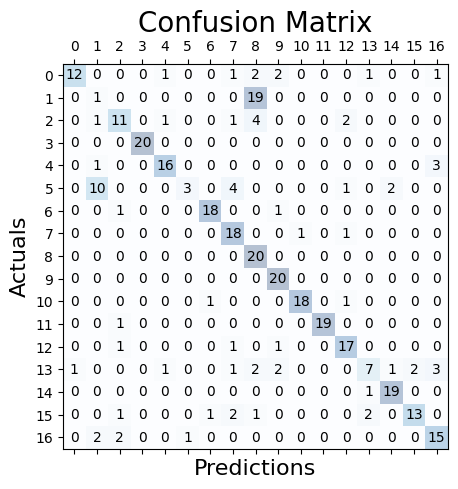

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator # to show all tick labels
fig, ax = plt.subplots(figsize=(5, 5)) # one subplot with size 5x5
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3) # alpha make the Blue light blue
ax.yaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
ax.xaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')

plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, test_pred, average='weighted')
recall = recall_score(y_true, test_pred, average='weighted')
f1 = f1_score(y_true, test_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7486025174970721
Recall: 0.7264705882352941
F1-score: 0.710458875477778


In [ ]:
# Initialize lists for true labels and predicted labels
true_labels1 = []
pred_labels1 = []

# Iterate over the test dataset to collect true labels and predicted labels
for data, label in test1_dataset:
    true_labels1.append(label.numpy())  # Append true label
    pred_labels1.append(np.argmax(CNN_model.predict(data), axis=1))  # Append predicted label

# Concatenate true labels and predicted labels into numpy arrays
y_true1 = np.concatenate(true_labels1)
test_pred1 = np.concatenate(pred_labels1)

# Compute confusion matrix
cm = confusion_matrix(y_true=y_true1, y_pred=test_pred1)
print(cm)

1/1 [==============================] - 0s 20ms/step
[[ 0  0  0  0  0]
 [10  3  4  1  2]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


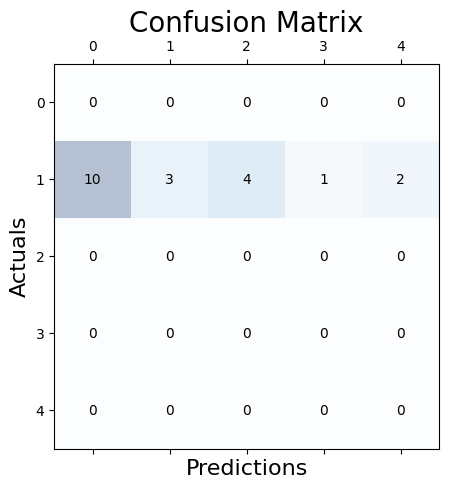

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator # to show all tick labels
fig, ax = plt.subplots(figsize=(5, 5)) # one subplot with size 5x5
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3) # alpha make the Blue light blue
ax.yaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
ax.xaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')

plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision1 = precision_score(y_true1, test_pred1, average='weighted')
recall1 = recall_score(y_true1, test_pred1, average='weighted')
f11 = f1_score(y_true1, test_pred1, average='weighted')

results.append({'Model': "CNN", 'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall,  'Accuracy C708': accuracy1, 'F1-Score C708': f1, 'Precision C708': precision, 'Recall C708': recall})

print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", f11)

Precision: 1.0
Recall: 0.15
F1-score: 0.2608695652173913


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Input layer remains the same
inputs = tf.keras.Input(shape=(180, 180, 3))

x = tf.keras.applications.resnet.preprocess_input(inputs)

# Use a pre-trained model as the base
x = tf.keras.applications.ResNet50(include_top=False)(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(17, activation='softmax')(x)

# Create the model
Resnet_model = tf.keras.Model(inputs, outputs)

# Compile the model with the same parameters
Resnet_model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

Resnet_model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 180, 180, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 180, 180, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_average_pooling2d (  (None, 2048)              0    

In [ ]:
# Fit the model
history = Resnet_model.fit(train_dataset,batch_size=64, epochs=30, validation_data=validation_dataset, callbacks=callbacks, verbose=1)
# Store history
histories.append(history)
# Evaluate the model
evaluation = Resnet_model.evaluate(test_dataset)
evaluation1 = Resnet_model.evaluate(test1_dataset)

# Collect evaluation metrics
accuracy = evaluation[1]  # Assuming accuracy is the second element in the evaluation result
accuracy1 = evaluation1[1]
# Append results

Epoch 1/30
86/86 [==============================] - 48s 187ms/step - loss: 1.4082 - accuracy: 0.5871 - val_loss: 8.5451 - val_accuracy: 0.2811 - lr: 0.0010
Epoch 2/30
86/86 [==============================] - 14s 155ms/step - loss: 0.6915 - accuracy: 0.7954 - val_loss: 39.4833 - val_accuracy: 0.0592 - lr: 0.0010
Epoch 3/30
86/86 [==============================] - 15s 156ms/step - loss: 0.5191 - accuracy: 0.8395 - val_loss: 4.8672 - val_accuracy: 0.2781 - lr: 0.0010
Epoch 4/30
86/86 [==============================] - 15s 156ms/step - loss: 0.4069 - accuracy: 0.8791 - val_loss: 8.2919 - val_accuracy: 0.2278 - lr: 0.0010
Epoch 5/30
86/86 [==============================] - 15s 154ms/step - loss: 0.2492 - accuracy: 0.9251 - val_loss: 1.5103 - val_accuracy: 0.6509 - lr: 0.0010
Epoch 6/30
85/86 [============================>.] - ETA: 0s - loss: 0.1699 - accuracy: 0.9456

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


86/86 [==============================] - 16s 168ms/step - loss: 0.1698 - accuracy: 0.9456 - val_loss: 0.7338 - val_accuracy: 0.8225 - lr: 0.0010
Epoch 7/30
86/86 [==============================] - 16s 169ms/step - loss: 0.1281 - accuracy: 0.9596 - val_loss: 0.7622 - val_accuracy: 0.8254 - lr: 0.0010
Epoch 8/30
86/86 [==============================] - 15s 155ms/step - loss: 0.1755 - accuracy: 0.9464 - val_loss: 1.1032 - val_accuracy: 0.7426 - lr: 0.0010
Epoch 9/30
86/86 [==============================] - 16s 170ms/step - loss: 0.1382 - accuracy: 0.9544 - val_loss: 0.5306 - val_accuracy: 0.8550 - lr: 0.0010
Epoch 10/30
86/86 [==============================] - 15s 154ms/step - loss: 0.1198 - accuracy: 0.9658 - val_loss: 0.8116 - val_accuracy: 0.8343 - lr: 0.0010
Epoch 11/30
86/86 [==============================] - 15s 167ms/step - loss: 0.0579 - accuracy: 0.9838 - val_loss: 0.5619 - val_accuracy: 0.8905 - lr: 0.0010
Epoch 12/30
86/86 [==============================] - 15s 153ms/step - los

In [ ]:
# Generate predictions
predictions = Resnet_model.predict(test_dataset)

# Initialize lists for true labels and predicted labels
true_labels = []
pred_labels = []

# Iterate over the test dataset to collect true labels and predicted labels
for data, label in test_dataset:
    true_labels.append(label.numpy())  # Append true label
    pred_labels.append(np.argmax(CNN_model.predict(data), axis=1))  # Append predicted label

# Concatenate true labels and predicted labels into numpy arrays
y_true = np.concatenate(true_labels)
test_pred = np.concatenate(pred_labels)

# Compute confusion matrix
cm = confusion_matrix(y_true=y_true, y_pred=test_pred)
print(cm)

1/1 [==============================] - 0s 20ms/step
[[12  0  0  0  1  0  0  1  2  2  0  0  0  1  0  0  1]
 [ 0  1  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  1 11  0  1  0  0  1  4  0  0  0  2  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 16  0  0  0  0  0  0  0  0  0  0  0  3]
 [ 0 10  0  0  0  3  0  4  0  0  0  0  1  0  2  0  0]
 [ 0  0  1  0  0  0 18  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0 18  0  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 19  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  1  0  0 17  0  0  0  0]
 [ 1  0  0  0  1  0  0  1  2  2  0  0  0  7  1  2  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1 19  0  0]
 [ 0  0  1  0  0  0  1  2  1  0  0  0  0  2  0 13  0]
 [ 0  2  2  0  0  1  0  0  0  0  0  0  0  0  0  0 15]]


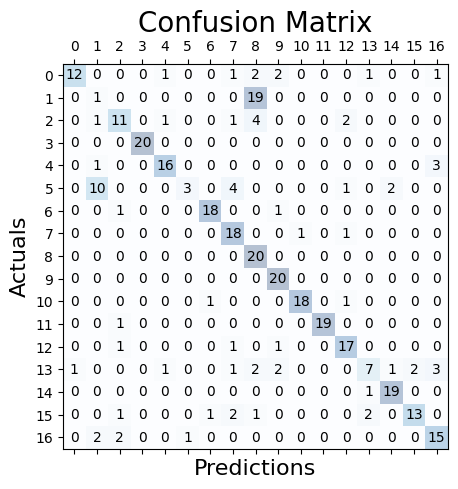

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5)) # one subplot with size 5x5
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3) # alpha make the Blue light blue
ax.yaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
ax.xaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')

plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [ ]:
precision = precision_score(y_true, test_pred, average='weighted')
recall = recall_score(y_true, test_pred, average='weighted')
f1 = f1_score(y_true, test_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7486025174970721
Recall: 0.7264705882352941
F1-score: 0.710458875477778


In [ ]:
# Initialize lists for true labels and predicted labels
true_labels1 = []
pred_labels1 = []

# Iterate over the test dataset to collect true labels and predicted labels
for data, label in test1_dataset:
    true_labels1.append(label.numpy())  # Append true label
    pred_labels1.append(np.argmax(Resnet_model.predict(data), axis=1))  # Append predicted label

# Concatenate true labels and predicted labels into numpy arrays
y_true1 = np.concatenate(true_labels1)
test_pred1 = np.concatenate(pred_labels1)

# Compute confusion matrix
cm = confusion_matrix(y_true=y_true1, y_pred=test_pred1)
print(cm)

1/1 [==============================] - 0s 25ms/step
[[19  1]
 [ 0  0]]


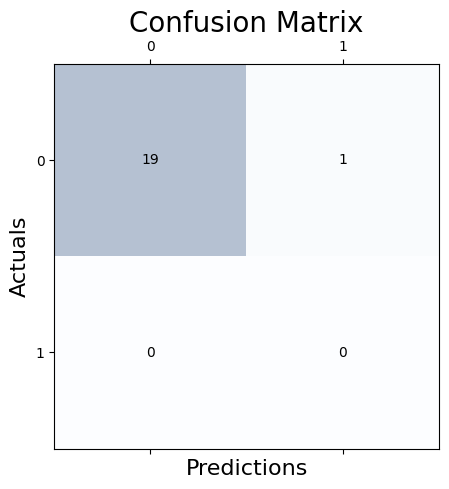

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5)) # one subplot with size 5x5
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3) # alpha make the Blue light blue
ax.yaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
ax.xaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')

plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [ ]:
precision1 = precision_score(y_true1, test_pred1, average='weighted')
recall1 = recall_score(y_true1, test_pred1, average='weighted')
f11 = f1_score(y_true1, test_pred1, average='weighted')

results.append({'Model': "Resnet50", 'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall,  'Accuracy C708': accuracy1, 'F1-Score C708': f1, 'Precision C708': precision, 'Recall C708': recall})

print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", f11)

Precision: 1.0
Recall: 0.95
F1-score: 0.9743589743589742


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Adding a data augmentation stage and a classifier to the convolutional base
conv_base  = tf.keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

inputs = tf.keras.Input(shape=(180, 180, 3))
x = tf.keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)

outputs = layers.Dense(17, activation="softmax")(x)

Vgg_model = tf.keras.Model(inputs, outputs)

Vgg_model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])
Vgg_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 tf.__operators__.getitem_1  (None, 180, 180, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_1 (TFOpLamb  (None, 180, 180, 3)       0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                                  

In [ ]:
# Fit the model
history = Vgg_model.fit(train_dataset,batch_size=64, epochs=30, validation_data=validation_dataset, callbacks=callbacks, verbose=1)
# Store history
histories.append(history)
# Evaluate the model
evaluation = Vgg_model.evaluate(test_dataset)
evaluation1 = Vgg_model.evaluate(test1_dataset)

# Collect evaluation metrics
accuracy = evaluation[1]  # Assuming accuracy is the second element in the evaluation result
accuracy1 = evaluation1[1]
# Append results

Epoch 1/30
86/86 [==============================] - 18s 171ms/step - loss: 3.0485 - accuracy: 0.3707 - val_loss: 1.2029 - val_accuracy: 0.6243 - lr: 0.0010
Epoch 2/30
86/86 [==============================] - 14s 147ms/step - loss: 1.1544 - accuracy: 0.6481 - val_loss: 0.8774 - val_accuracy: 0.7278 - lr: 0.0010
Epoch 3/30
86/86 [==============================] - 13s 144ms/step - loss: 0.8538 - accuracy: 0.7337 - val_loss: 0.6702 - val_accuracy: 0.8136 - lr: 0.0010
Epoch 4/30
86/86 [==============================] - 14s 145ms/step - loss: 0.6327 - accuracy: 0.8053 - val_loss: 0.6474 - val_accuracy: 0.8373 - lr: 0.0010
Epoch 5/30
86/86 [==============================] - 14s 148ms/step - loss: 0.6184 - accuracy: 0.8020 - val_loss: 0.5407 - val_accuracy: 0.8402 - lr: 0.0010
Epoch 6/30
86/86 [==============================] - 14s 147ms/step - loss: 0.5396 - accuracy: 0.8325 - val_loss: 0.5544 - val_accuracy: 0.8314 - lr: 0.0010
Epoch 7/30
86/86 [==============================] - 14s 146ms/st

In [ ]:
# Generate predictions
predictions = Vgg_model.predict(test_dataset)

# Initialize lists for true labels and predicted labels
true_labels = []
pred_labels = []

# Iterate over the test dataset to collect true labels and predicted labels
for data, label in test_dataset:
    true_labels.append(label.numpy())  # Append true label
    pred_labels.append(np.argmax(CNN_model.predict(data), axis=1))  # Append predicted label

# Concatenate true labels and predicted labels into numpy arrays
y_true = np.concatenate(true_labels)
test_pred = np.concatenate(pred_labels)

# Compute confusion matrix
cm = confusion_matrix(y_true=y_true, y_pred=test_pred)
print(cm)

1/1 [==============================] - 0s 20ms/step
[[12  0  0  0  1  0  0  1  2  2  0  0  0  1  0  0  1]
 [ 0  1  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  1 11  0  1  0  0  1  4  0  0  0  2  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 16  0  0  0  0  0  0  0  0  0  0  0  3]
 [ 0 10  0  0  0  3  0  4  0  0  0  0  1  0  2  0  0]
 [ 0  0  1  0  0  0 18  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0 18  0  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 19  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  1  0  0 17  0  0  0  0]
 [ 1  0  0  0  1  0  0  1  2  2  0  0  0  7  1  2  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1 19  0  0]
 [ 0  0  1  0  0  0  1  2  1  0  0  0  0  2  0 13  0]
 [ 0  2  2  0  0  1  0  0  0  0  0  0  0  0  0  0 15]]


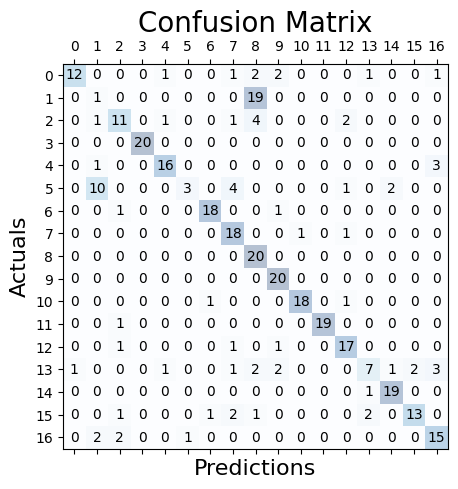

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5)) # one subplot with size 5x5
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3) # alpha make the Blue light blue
ax.yaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
ax.xaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')

plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [ ]:
precision = precision_score(y_true, test_pred, average='weighted')
recall = recall_score(y_true, test_pred, average='weighted')
f1 = f1_score(y_true, test_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7486025174970721
Recall: 0.7264705882352941
F1-score: 0.710458875477778


In [ ]:
# Initialize lists for true labels and predicted labels
true_labels1 = []
pred_labels1 = []

# Iterate over the test dataset to collect true labels and predicted labels
for data, label in test1_dataset:
    true_labels1.append(label.numpy())  # Append true label
    pred_labels1.append(np.argmax(Vgg_model.predict(data), axis=1))  # Append predicted label

# Concatenate true labels and predicted labels into numpy arrays
y_true1 = np.concatenate(true_labels1)
test_pred1 = np.concatenate(pred_labels1)

# Compute confusion matrix
cm = confusion_matrix(y_true=y_true1, y_pred=test_pred1)
print(cm)

1/1 [==============================] - 0s 20ms/step
[[16  1  2  1]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]


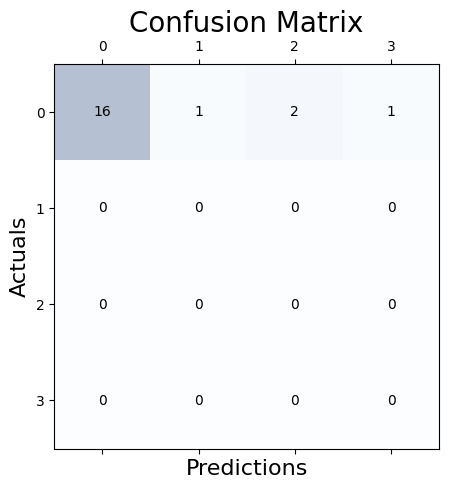

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5)) # one subplot with size 5x5
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3) # alpha make the Blue light blue
ax.yaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
ax.xaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')

plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [ ]:
precision1 = precision_score(y_true1, test_pred1, average='weighted')
recall1 = recall_score(y_true1, test_pred1, average='weighted')
f11 = f1_score(y_true1, test_pred1, average='weighted')

results.append({'Model': "VGG16", 'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall,  'Accuracy C708': accuracy1, 'F1-Score C708': f1, 'Precision C708': precision, 'Recall C708': recall})

print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", f11)

Precision: 1.0
Recall: 0.8
F1-score: 0.888888888888889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from tensorflow.keras.applications import EfficientNetB1

# Load the pre-trained EfficientNetB1 model without the top classification layer
base_model = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add a custom classification head
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(17, activation='softmax')(x)

# Create the final model
EfficientNet_model = tf.keras.Model(inputs=base_model.input, outputs=outputs)

# Compile the model
EfficientNet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
EfficientNet_model.summary()


27018416/27018416 [==============================] - 0s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, 180, 180, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 180, 180, 3)          7         ['rescaling_1[0][0]']         
 on)                                                                                              
                                                                                                  
 rescaling_2 (Rescaling)   

In [ ]:
# Fit the model
history = EfficientNet_model.fit(train_dataset,batch_size=64, epochs=30, validation_data=validation_dataset, callbacks=callbacks, verbose=1)
# Store history
histories.append(history)
# Evaluate the model
evaluation = EfficientNet_model.evaluate(test_dataset)
evaluation1 = EfficientNet_model.evaluate(test1_dataset)

# Collect evaluation metrics
accuracy = evaluation[1]  # Assuming accuracy is the second element in the evaluation result
accuracy1 = evaluation1[1]
# Append results

Epoch 1/30
86/86 [==============================] - 25s 181ms/step - loss: 1.8006 - accuracy: 0.4431 - val_loss: 1.0712 - val_accuracy: 0.6893 - lr: 0.0010
Epoch 2/30
86/86 [==============================] - 14s 147ms/step - loss: 1.0744 - accuracy: 0.6661 - val_loss: 0.8343 - val_accuracy: 0.7515 - lr: 0.0010
Epoch 3/30
86/86 [==============================] - 14s 145ms/step - loss: 0.8719 - accuracy: 0.7314 - val_loss: 0.6339 - val_accuracy: 0.8166 - lr: 0.0010
Epoch 4/30
86/86 [==============================] - 14s 147ms/step - loss: 0.7194 - accuracy: 0.7796 - val_loss: 0.5977 - val_accuracy: 0.8284 - lr: 0.0010
Epoch 5/30
86/86 [==============================] - 13s 143ms/step - loss: 0.6229 - accuracy: 0.8064 - val_loss: 0.5038 - val_accuracy: 0.8757 - lr: 0.0010
Epoch 6/30
86/86 [==============================] - 13s 145ms/step - loss: 0.6269 - accuracy: 0.7968 - val_loss: 0.4513 - val_accuracy: 0.8698 - lr: 0.0010
Epoch 7/30
86/86 [==============================] - 14s 146ms/st

In [ ]:
# Generate predictions
predictions = EfficientNet_model.predict(test_dataset)

# Initialize lists for true labels and predicted labels
true_labels = []
pred_labels = []

# Iterate over the test dataset to collect true labels and predicted labels
for data, label in test_dataset:
    true_labels.append(label.numpy())  # Append true label
    pred_labels.append(np.argmax(CNN_model.predict(data), axis=1))  # Append predicted label

# Concatenate true labels and predicted labels into numpy arrays
y_true = np.concatenate(true_labels)
test_pred = np.concatenate(pred_labels)

# Compute confusion matrix
cm = confusion_matrix(y_true=y_true, y_pred=test_pred)
print(cm)

1/1 [==============================] - 0s 20ms/step
[[12  0  0  0  1  0  0  1  2  2  0  0  0  1  0  0  1]
 [ 0  1  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  1 11  0  1  0  0  1  4  0  0  0  2  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 16  0  0  0  0  0  0  0  0  0  0  0  3]
 [ 0 10  0  0  0  3  0  4  0  0  0  0  1  0  2  0  0]
 [ 0  0  1  0  0  0 18  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0 18  0  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 19  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  1  0  0 17  0  0  0  0]
 [ 1  0  0  0  1  0  0  1  2  2  0  0  0  7  1  2  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1 19  0  0]
 [ 0  0  1  0  0  0  1  2  1  0  0  0  0  2  0 13  0]
 [ 0  2  2  0  0  1  0  0  0  0  0  0  0  0  0  0 15]]


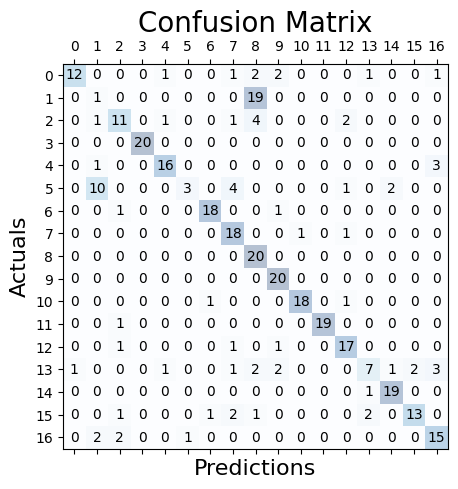

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5)) # one subplot with size 5x5
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3) # alpha make the Blue light blue
ax.yaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
ax.xaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')

plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [ ]:
precision = precision_score(y_true, test_pred, average='weighted')
recall = recall_score(y_true, test_pred, average='weighted')
f1 = f1_score(y_true, test_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7486025174970721
Recall: 0.7264705882352941
F1-score: 0.710458875477778


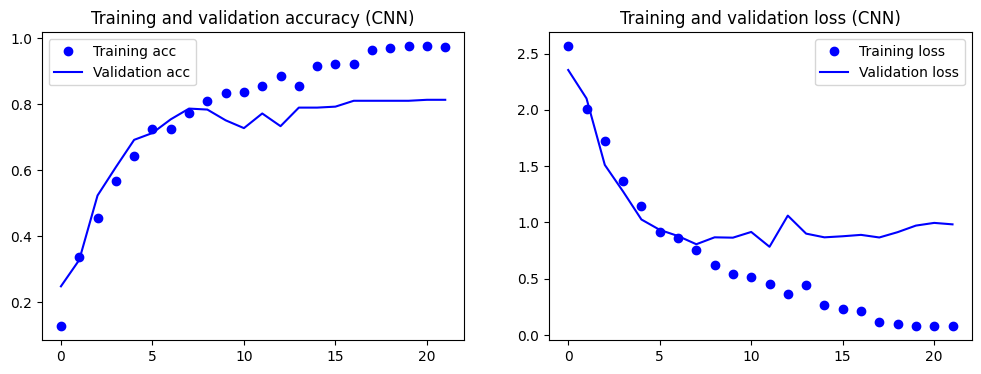

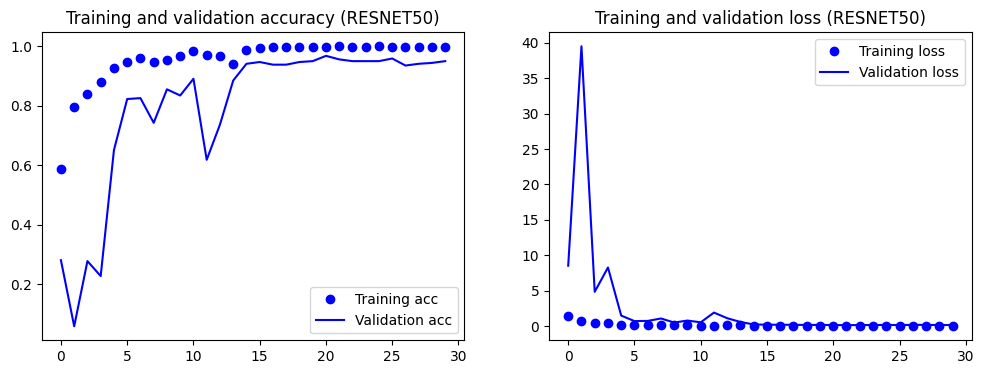

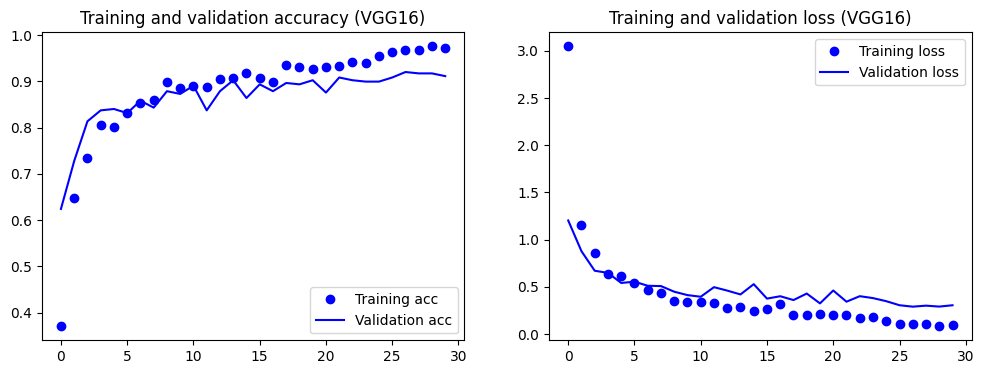

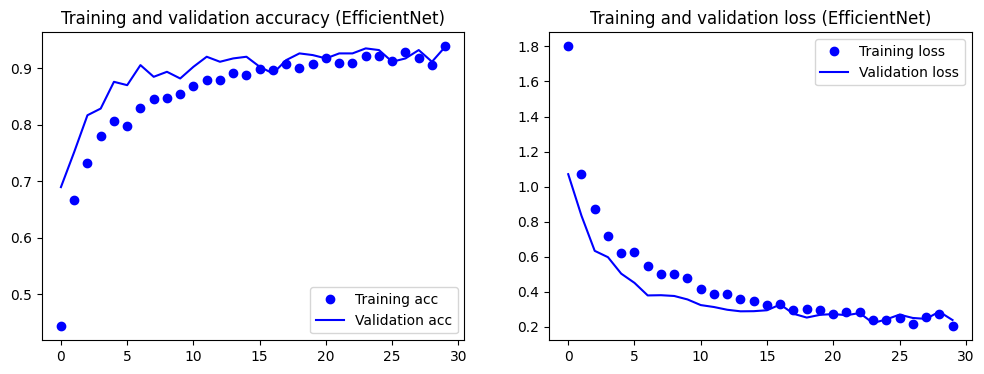

In [ ]:
import matplotlib.pyplot as plt


model_names = ['CNN', 'RESNET50', 'VGG16', 'EfficientNet']

for model_name, history in zip(model_names, histories):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)

    ax1.plot(epochs, acc, 'bo', label='Training acc')
    ax1.plot(epochs, val_acc, 'b', label='Validation acc')
    ax1.set_title(f'Training and validation accuracy ({model_name})')
    #ax1.set_ylim([0.6, 0.95])
    ax1.legend()

    ax2.plot(epochs, loss, 'bo', label='Training loss')
    ax2.plot(epochs, val_loss, 'b', label='Validation loss')
    #ax2.set_ylim([0.1,0.7]) # To compare with FE1
    ax2.set_title(f'Training and validation loss ({model_name})')
    ax2.legend()

    plt.show()

In [ ]:
X_test = []
y_test = []
for images, labels in test_dataset:
    X_test.append(images.numpy())
    y_test.append(labels.numpy())

# Convert lists to numpy arrays
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Predict probabilities for each model
probs_model1 = CNN_model.predict(X_test)
probs_model2 = Resnet_model.predict(X_test)
probs_model3 = Vgg_model.predict(X_test)
probs_model4 = EfficientNet_model.predict(X_test)

# Define weights for each model
weights = [0.1, 0.2, 0.3, 0.4]

# Combine probabilities from all models with weights
weighted_probs = np.average([probs_model1, probs_model2, probs_model3, probs_model4], axis=0, weights=weights)

# Predict the class with the highest weighted probability
ensemble_predictions = np.argmax(weighted_probs, axis=1)

# Evaluate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Validation Accuracy:", accuracy)

11/11 [==============================] - 3s 22ms/step
Validation Accuracy: 0.8941176470588236


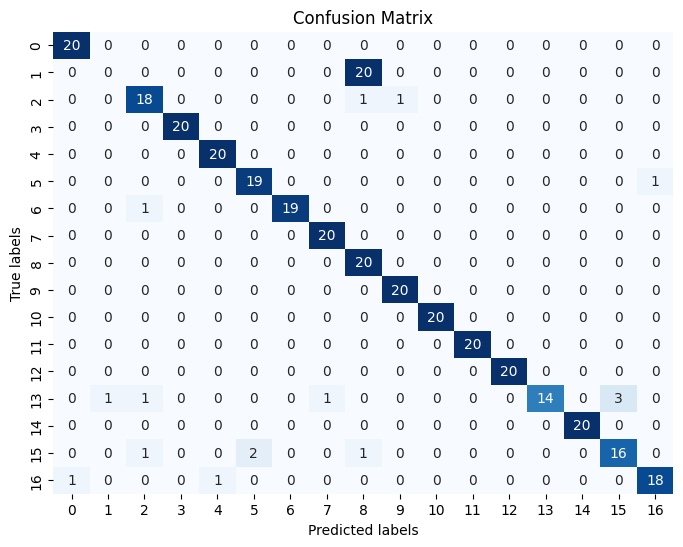

In [ ]:
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, ensemble_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
precision = precision_score(y_test, ensemble_predictions, average='weighted')
recall = recall_score(y_test, ensemble_predictions, average='weighted')
f1 = f1_score(y_test, ensemble_predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.8727701606958573
Recall: 0.8941176470588236
F1-score: 0.8761150878356904


In [ ]:
precision1 = precision_score(y_true1, test_pred1, average='weighted')
recall1 = recall_score(y_true1, test_pred1, average='weighted')
f11 = f1_score(y_true1, test_pred1, average='weighted')

results.append({'Model': "Voting", 'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall,  'Accuracy C708': accuracy1, 'F1-Score C708': f1, 'Precision C708': precision, 'Recall C708': recall})

print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", f11)

Precision: 1.0
Recall: 0.8
F1-score: 0.888888888888889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Display results as table
print(df_results)

      Model  Accuracy  F1-Score  Precision    Recall  Accuracy C708  \
0       CNN  0.726471  0.710459   0.748603  0.726471           0.15   
1  Resnet50  0.879412  0.710459   0.748603  0.726471           0.95   
2     VGG16  0.873529  0.710459   0.748603  0.726471           0.80   
3    Voting  0.894118  0.876115   0.872770  0.894118           1.00   

   F1-Score C708  Precision C708  Recall C708  
0       0.710459        0.748603     0.726471  
1       0.710459        0.748603     0.726471  
2       0.710459        0.748603     0.726471  
3       0.876115        0.872770     0.894118  
